# CA3 Integrated Assessment - Predicting the Exchange Rate

In this notebook I will answer the integrated assessement "CA3". The purpose of this assessement is to follow the guidelines of the CRIP_DM to, through data mining tools, answer the question provided by the lecturer. The Foreign_Exchange_Rates.csv data set, also provided by the lecturer, will be used in this analysis.

# 1. Business Understanding

Following the CRISP-DM guidelines, we start the project whith a Business Undestanding. I this case the posed question is **"Can we predict the Exchange rate of a country by its past rates?"**. The first stage of the CRISP-DM process is to understand what you want to accomplish from a business perspective.

Data analysis and the search for patterns in them are essential activities in the financial market. Investors always try to have all the information possible before making their investment decision.

Foreign exchange investments are no different and the search for patterns in a historical exchange rate series is essential to predict the future exchange rate.

In answering the question, we will be developing a tool that can assist investors in their analysis of the foreign exchange market.

Firstly, It is breakdown broad general question into more narrow and specific questions that can be targeted by modelling or exploratory analysis.

   1) **Can we predict the euro area exchange rate for the next day using the previous rates?**
 

## 1.1 Assessment of the Current Situation
During the initial phase, it is important to obtain detailed information on all the features, constraints, assumptions and other factors that need to be considered in determining the data analysis goal and project plan.

### 1.1.1. Inventory of Resources 
Resources available to the project including:

- Personnel: One developer;
- Data: Foreign_Exchange_Rates.csv, data set provide by the lecturer.
- Computing resources: Laptop with processor I5-9300H 2.40GHz, 8.00 GB of RAM and GPU GeForce GTX 1650.
- Software: Windows 10; Anaconda 3; Python 3 with pandas, matplotlib, numpy and seaborn; Jupyter Notebook.

### 1.1.2. Requirements, Assumptions and Constraints
The requirements of this project are:
- Use the data set provided;
- Answer the question defined for the data set;
- Use the CRIP-DM methodology;
- The project must be developed using the Jupyter Notebook;
- The project has 15 days to be completed.

The assumptions and constraints of this project are:
- The data contained in the data set will be considered valid, there will be no checking of them;
- The project will be restricted to the time for completion, due to the data obtained and the data mining algorithms and techniques known to the developer.
- The exchange rate varies due to numerous factors, among them there are unpredictable factors that can affect exchange rates. This project is not intended to predict these types of factors. The project will be strictly limited to the historical analysis of exchange rates.
- The exchange rate forecast will have an academic character, this forecast should not be used for real exchange operations.

### 1.1.3. Risks and Contingencies 
Problems with the implementation of some algorithm, some error in the data set data and low model accuracy are the risks that can delay the project or cause a failure.
In order to avoid or minimize these risks during the development of the project, the following contingency actions will be taken:
- Use of known algorithms and with good bibliographic reference;
- Use of error checking techniques in the data set before elaborating the model;
- Correct training, as well as carrying out tests on the model, will increase its accuracy. If necessary, other algorithms will be tested to increase the accuracy of the model.

### 1.1.4. Terminology 
- Exchange rate - The value of one currency for the purpose of conversion to another.
- CRISP-DM - Cross-Industry Standart Process for Data Mining. The methodology provides a structured approach to planning a data mining project.
- Algorithm - A process or set of rules to be followed in calculations or other problem-solving operations, especially by a computer.
- Data set - A collection of related sets of information that is composed of separate elements but can be manipulated as a unit by a computer.
- Model - Refers to a group of processes in a set of data are combined and analyzed to uncover relationships or patterns.
- Accuracy - Accuracy is one metric for evaluating classification models. Accuracy has the following definition: Number of correct predictions / Total number of predictions.

### 1.1.5. Costs and Benefits 
The cost of implementing this project is relatively low. The cost is basically the value of 10 to 15 days of work for a beginner level developer. The cost of purchasing the computer can be amortized in different projects, reducing the cost of the same for this project. With the exception of Windows, which in general is already installed on the computer, all other software is free, without costing the project.

Even though the forecast is highly accurate, this model should not be used as the only decision tool for foreign exchange investment. However, it can be used as a trend indicator. It could be used by the investor as a source of information so that he can make his decision as an investor or not, saving the investor time in analyzing the exchange rate graphs.

Knowing the limits of the project, it can be very useful when used together with other tools to analyze the foreign exchange market. Therefore, the project has a good cost benefit.

## 1.2. Data Mining Goals 
### 1.2.1. Business Success Criteria
- That the exchange rate forecast has a high hit rate.

### 1.2.2. Data Mining Success Criteria
- That the model has an accuracy on Mean Square Error test less than 1 in predicting the exchange rate.

## 1.3. Project Plan
To answer the question proposed for this analysis, it is necessary to carry out an exploratory and comparative statistical analysis of the Data Set. Several data mining tools will be used so that we can verify, explore and analyze the data to be used in the model. The model built will be able to use the available data and inform with a certain level of accuracy the forecast of the exchange rate for a given country.

Care must be taken in evaluating the results and in the model used so that they are statistically significant, ensuring that the conclusions are robust enough.


# 2. Data Understanding
In the second stage of the CRISP-DM process, a preliminary verification and analysis of the data will be carried out. This preliminary verification and analysis includes: Loading data; Description of the data; Data Quality Check; Initial exploration of the data.

## 2.1 Initial Data Report
The data to be used in this project are in the file "Foreign_Exchange_Rates.csv". The "pandas" library will be used to create the data set from the file data.

In [1]:
# # --- Import Libraries --- # #
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
# # --- Import Data Set --- # #
df =  pd.read_csv("Foreign_Exchange_Rates.csv") 

## 2.2 Describe Data
Some functions available in our data set will be used so that it is possible to carry out a first verification and analysis of the data.

In [3]:
df.columns

Index(['Unnamed: 0', 'Time Serie', 'AUSTRALIA - AUSTRALIAN DOLLAR/US$',
       'EURO AREA - EURO/US$', 'NEW ZEALAND - NEW ZELAND DOLLAR/US$',
       'UNITED KINGDOM - UNITED KINGDOM POUND/US$', 'BRAZIL - REAL/US$',
       'CANADA - CANADIAN DOLLAR/US$', 'CHINA - YUAN/US$',
       'HONG KONG - HONG KONG DOLLAR/US$', 'INDIA - INDIAN RUPEE/US$',
       'KOREA - WON/US$', 'MEXICO - MEXICAN PESO/US$',
       'SOUTH AFRICA - RAND/US$', 'SINGAPORE - SINGAPORE DOLLAR/US$',
       'DENMARK - DANISH KRONE/US$', 'JAPAN - YEN/US$',
       'MALAYSIA - RINGGIT/US$', 'NORWAY - NORWEGIAN KRONE/US$',
       'SWEDEN - KRONA/US$', 'SRI LANKA - SRI LANKAN RUPEE/US$',
       'SWITZERLAND - FRANC/US$', 'TAIWAN - NEW TAIWAN DOLLAR/US$',
       'THAILAND - BAHT/US$'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Unnamed: 0                                 5217 non-null   int64 
 1   Time Serie                                 5217 non-null   object
 2   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object
 3   EURO AREA - EURO/US$                       5217 non-null   object
 4   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object
 5   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object
 6   BRAZIL - REAL/US$                          5217 non-null   object
 7   CANADA - CANADIAN DOLLAR/US$               5217 non-null   object
 8   CHINA - YUAN/US$                           5217 non-null   object
 9   HONG KONG - HONG KONG DOLLAR/US$           5217 non-null   object
 10  INDIA - INDIAN RUPEE/US$            

In [5]:
df.head(5)

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [6]:
df.tail(5)

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
5212,5212,2019-12-25,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
5213,5213,2019-12-26,1.4411,0.9007,1.5002,0.7688,4.0602,1.3124,6.9949,7.788,...,1.354,6.7295,109.67,4.1337,8.8799,9.4108,181.3,0.9808,30.11,30.15
5214,5214,2019-12-27,1.4331,0.8949,1.4919,0.7639,4.0507,1.3073,6.9954,7.7874,...,1.352,6.6829,109.47,4.126,8.8291,9.3405,181.35,0.9741,30.09,30.14
5215,5215,2019-12-30,1.4278,0.8915,1.4846,0.761,4.0152,1.3058,6.9864,7.7857,...,1.3483,6.6589,108.85,4.1053,8.7839,9.3145,181.6,0.9677,30.04,29.94
5216,5216,2019-12-31,1.4225,0.8907,1.4826,0.7536,4.019,1.2962,6.9618,7.7894,...,1.3446,6.6554,108.67,4.0918,8.7823,9.3425,181.3,0.9677,29.91,29.75


**Data Summary Description:**
- 5217 entries of 24 variables;
- The data set has the exchange rate of 22 different countries;
- All exchange rates are as Object. Exchange rates will need to be converted to Int64;
- All time serie are as Object. Time serie will need to be converted to datetime64;
- Data starts on 1/3/2000 and ends on 12/31/2019.
- It is necessary to format the labels of all columns. The use of special characters and blank spaces may cause errors during the execution of the algorithms.


### 2.2.1 Formating Data Set
As we saw in the description of the data summary, it is necessary to format the Exchange Rate and Time Serie data type, as well as format the labels.

In [7]:
df.columns = ["id", "date", "australian_dollar", "euro", "new_zeland_dollar", "united_kingdom_pound", "real", "canadian_dollar",
             "yuan", "hong_kong_dollar", "indian_rupee", "won", "mexican_peso", "rand", "singapore_dollar", "danish_krone", 
             "yen", "ringgit", "norwegian krone", "krona", "siri_lankan_rupee", "franc", "new_taiwan_dollar", "bath"]

In [8]:
df['date'] = df['date'].astype('datetime64')

In [9]:
non_numeric_data = df["euro"].str.contains("[^0-9.-]")
df.loc[non_numeric_data].head(5)

,id,date,australian_dollar,euro,new_zeland_dollar,united_kingdom_pound,real,canadian_dollar,yuan,hong_kong_dollar,...,singapore_dollar,danish_krone,yen,ringgit,norwegian krone,krona,siri_lankan_rupee,franc,new_taiwan_dollar,bath
10,10,2000-01-17,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
35,35,2000-02-21,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
105,105,2000-05-29,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
131,131,2000-07-04,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND
175,175,2000-09-04,ND,ND,ND,ND,ND,ND,ND,ND,...,ND,ND,ND,ND,ND,ND,ND,ND,ND,ND


Some values are strings, wich have been used to indicate missing data. Are there any other values that have crept in?

In [10]:
set(df.euro[non_numeric_data])

{'ND'}

Now, it is necessary to check how many values are missing.

In [11]:
len(df.euro[non_numeric_data])

198

It is a small fraction of data set, though not completely inconsequential as it is still arround 3,8%. If rows containing "ND" are, roughly, uniformly distributed over the years, the easiest solution would just be to remove then. So it is necessary have a look at the distribuition

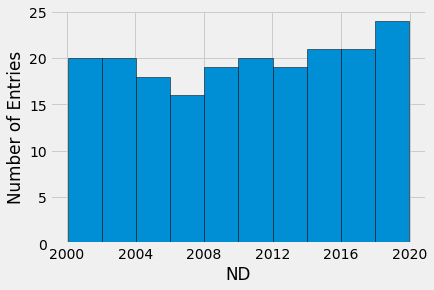

In [12]:
plt.style.use('fivethirtyeight')
plt.hist(df.date[non_numeric_data].dropna(), edgecolor = 'k');
plt.xlabel("ND"); plt.ylabel('Number of Entries'); 

We can see that the most invalid values in a year is fewer than 25. For the purposes this number is acceptable and go ahead and remove these rows.

In [13]:
columns = ["australian_dollar", "euro", "new_zeland_dollar", "united_kingdom_pound", "real", "canadian_dollar",
             "yuan", "hong_kong_dollar", "indian_rupee", "won", "mexican_peso", "rand", "singapore_dollar", "danish_krone", 
             "yen", "ringgit", "norwegian krone", "krona", "siri_lankan_rupee", "franc", "new_taiwan_dollar", "bath"]

for iten in columns:
    non_numeric = df[iten].str.contains("[^0-9.-]")
    df = df.loc[~non_numeric]
    df[iten] = df[iten].apply(pd.to_numeric)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5015 entries, 0 to 5216
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5015 non-null   int64         
 1   date                  5015 non-null   datetime64[ns]
 2   australian_dollar     5015 non-null   float64       
 3   euro                  5015 non-null   float64       
 4   new_zeland_dollar     5015 non-null   float64       
 5   united_kingdom_pound  5015 non-null   float64       
 6   real                  5015 non-null   float64       
 7   canadian_dollar       5015 non-null   float64       
 8   yuan                  5015 non-null   float64       
 9   hong_kong_dollar      5015 non-null   float64       
 10  indian_rupee          5015 non-null   float64       
 11  won                   5015 non-null   float64       
 12  mexican_peso          5015 non-null   float64       
 13  rand              

Now with the formatted data set we can continue with Data Understanding

## 2.3 Verify Data Quality
The quality of the data will be examined, addressing issues such as:

- Is the data complete (covers all necessary cases)?
- Is it correct or does it contain errors, and if there are errors, how common are they?
- Are there missing values in the data? If so, how are they represented, where do they occur and how common are they?

### 2.3.1. Erros in Data
As we saw in section 2.2. our data set contains an error in the data type. Exchange rate values must be of the Int64 type and the Time Serie values must be of the Datetime64 . These errors were corrected in section 2.2.1 while formatting the data set.

### 2.3.2. Missing Data
We need to check if our data is missing values. They can occur for a variety of reasons and need to be filled in or removed before we train our model. First, let's get a sense of how many missing values are in each column.

In stage 3, data analysis will be carried out and if necessary, the necessary changes will be made to the Data Set. Although we always need to be careful about removing information, if a column has a high percentage of missing values, it will probably not be useful for our model.

In [15]:
df.isnull().sum()

id                      0
date                    0
australian_dollar       0
euro                    0
new_zeland_dollar       0
united_kingdom_pound    0
real                    0
canadian_dollar         0
yuan                    0
hong_kong_dollar        0
indian_rupee            0
won                     0
mexican_peso            0
rand                    0
singapore_dollar        0
danish_krone            0
yen                     0
ringgit                 0
norwegian krone         0
krona                   0
siri_lankan_rupee       0
franc                   0
new_taiwan_dollar       0
bath                    0
dtype: int64

In [16]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

In [17]:
missing_values_table(df)

Your selected dataframe has 24 columns.
There are 0 columns that have missing values.


### 2.3.3. Outliers
At this point, we may also want to remove outliers. These can be due to typos in data entry, mistakes in units, or they could be legitimate but extreme values.

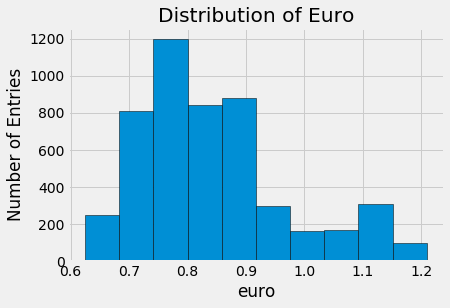

In [18]:
#plt.hist(df.euro, bins=100)
#plt.show
plt.style.use('fivethirtyeight')
plt.hist(df["euro"].dropna(), edgecolor = 'k');
plt.xlabel("euro"); plt.ylabel('Number of Entries'); 
plt.title('Distribution of '+"Euro");

Analyzing the above diagram of distribution of Euro, there is no evidence of the presence of outliers.

## 2.4 Initial Data Exploration
During this stage, data mining issues will be addressed using consultation, data visualization and reporting techniques. These include:

- **Distribution** of key attributes (for example, the target attribute of a prediction task)
- **Relationships** between pairs or small numbers of attributes
- Results of **simple aggregations**
- **Properties** of significant sub-populations
- **Simple** statistical analyses

These analyzes directly address your data mining objectives. They also help to refine the data description and quality reports, in addition to feeding the transformation steps and other data preparation steps necessary for further analysis.

- **Data exploration report** - The results of the data exploration, including the first findings or initial hypotheses and their impact on the rest of the project, will be described.

### 2.4.1 Distributions
The analysis of data distribution in our DataSet was carried out in section 2.3.3. Outliers. The analysis of the distribution was necessary to verify if in our data set there were Outliers that could interfere in our model.

### 2.4.2 Correlations
The correlation analysis is useful to visualize the relationship between the variables of the DataSet. We can derive any correlation from that data set. The Pairplot chart provides us with correlations, distributions and regression path. The correlelogram is very useful for exploratory analysis. It allows you to quickly observe the relationship between all the variables in your matrix.

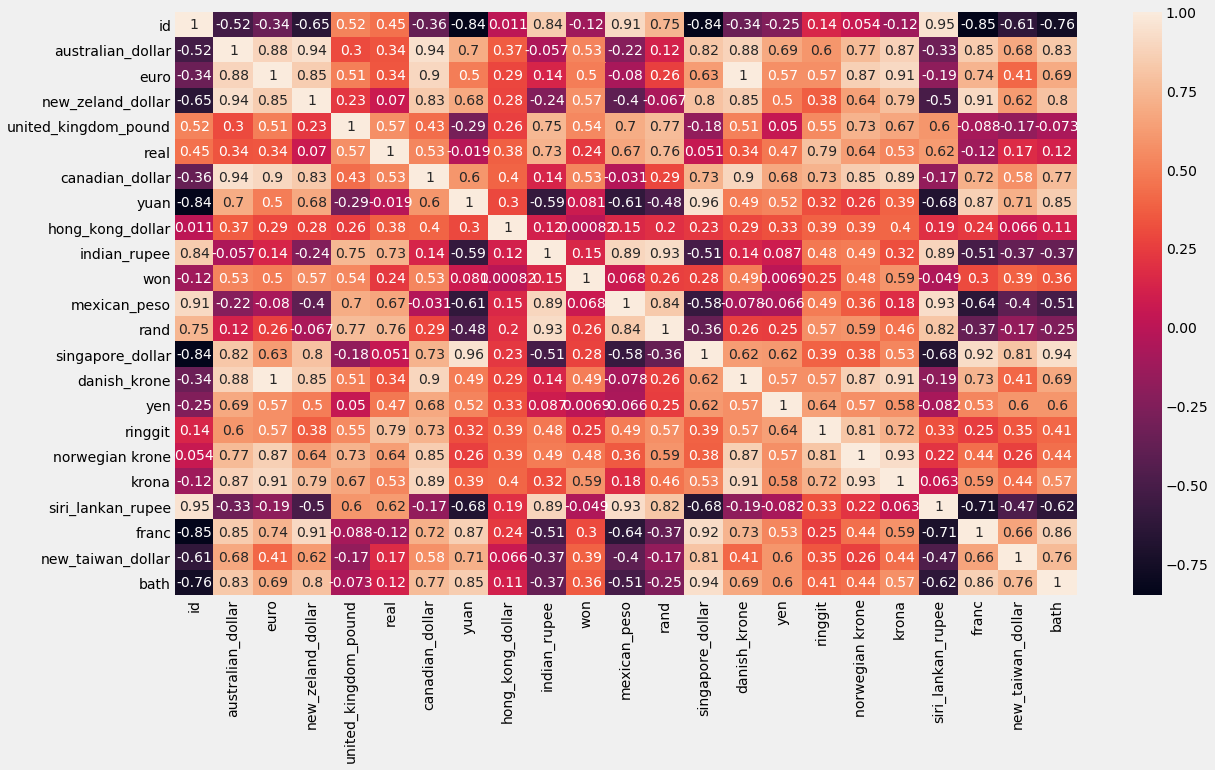

In [19]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)

### 2.4.3. Historical Chart
The Historical Euro Exchange Rate graph allows to verify the changes in rates in relation to time.

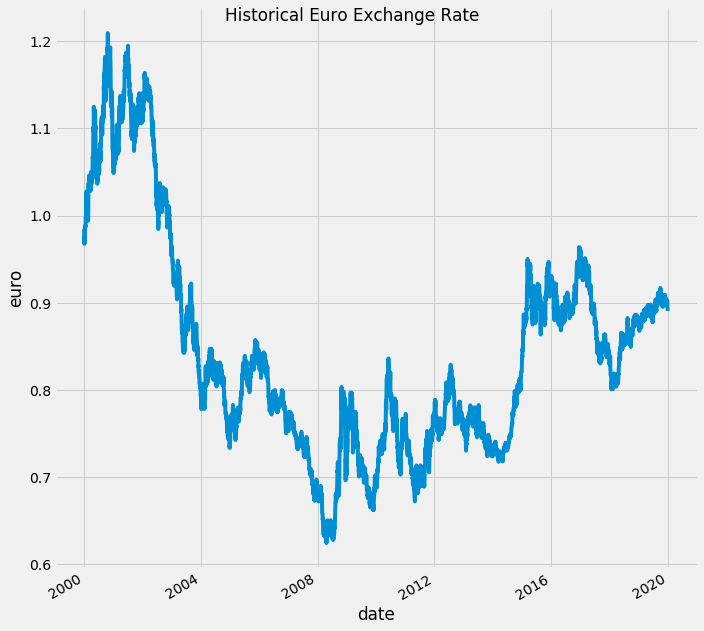

In [20]:
g = sns.relplot(x="date", y="euro", kind="line", data=df, height=10)
g.fig.suptitle('Historical Euro Exchange Rate')
g.fig.autofmt_xdate()

## 2.5 Data Quality Report
The following results were obtained when carrying out the initial exploration of the data:
- The data set has been formatted, the variables are with the correct type and the labels are correct.
- It was found that 3.8% of the values were missing. An analysis was made of the distribution of these values over time. It was decided that these values could be removed.
- The distribution of the values of the exchange rates of the Euro were analyzed to verify the occurrence of Outliers. Due to the distribution of values, the presence of outliers was not evidenced.
- The correlation between exchange rates was realized.

# 3. Data Preperation
At this stage of the project it will be decided which data will be used for the analysis. The criteria used to make this decision include the relevance of the data to your data mining objectives, the quality of the data and also technical constraints, such as limits on volume or types of data. Data selection will cover column selection.

## 3.1. Select Data
In order for us to develop our model so that the model answers our question, it is not necessary that our DataSet has data on the other currencies.
Therefore, as the other currencies are not relevant, a new DataSet will be created with only data related to the Euro.

In [21]:
df_euro = pd.DataFrame()
df_euro = df[['date','euro']]
df_euro.info()
df_euro.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5015 entries, 0 to 5216
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5015 non-null   datetime64[ns]
 1   euro    5015 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 117.5 KB


,date,euro
0,2000-01-03,0.9847
1,2000-01-04,0.9700
2,2000-01-05,0.9676
3,2000-01-06,0.9686
4,2000-01-07,0.9714
5,2000-01-10,0.9754
6,2000-01-11,0.9688
7,2000-01-12,0.9727
8,2000-01-13,0.9737
9,2000-01-14,0.9874


## 3.2. Clean Data
It is very important that the DataSet is clean before we start modeling. To perform this cleaning and increase the quality of the data in our DataSet. The goal here is to prevent erroneous data from interfering with the model resulting in wrong results.
The activities performed to clear the data were:

- It was found that 3.8% of the values were missing. An analysis was made of the distribution of these values over time. These values were removed.
- All exchange rates are as Object. Exchange rates were converted to Int64;
- All time serie are as Object. Time serie was converted to datetime64;
- All column labels have been formatted to reemove characters and blank spaces  that may cause errors during the execution of the algorithms.

# 4. Modelling

To answer our question, two modeling techniques will be used. These techniques will be used so that we can verify which one produces the most accurate results.



## 4.1. Select Modeling Technique
First, the ARIMA model will be used. ARIMA is a statistical model for analyzing and forecasting time series data. ARIMA stands for AutoRegressive Integrated Moving Average. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- **AR:** Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- **I:** Integrated. The use of differencing of raw observations (i.e. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- **MA:** Moving Average. A model that uses the dependency between an observation and residual errors from a moving average model applied to lagged observations.

A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used. The parameters are defined as follows:

- **p:** The number of lag observations included in the model, also called the lag order.
- **d:** The number of times that the raw observations are differenced, also called the degree of differencing.
- **q:** The size of the moving average window, also called the order of moving average.

The second model is the RNN. Recurrent neural network is a type of neural network in which the output from the previous step is inserted into the current step. Traditionally in neural networks, all inputs and outputs are independent, however, when it is necessary to predict the next word in a sentence, the previous words are necessary, therefore, it is necessary to store the previous words. RNN solved this problem with the addition of a hidden layer. The main and most important characteristic of the RNN is the Hidden state, which resembles some information about a sequence.

RNN stores all information about what was calculated. It uses the same parameters for each input, as it performs the same task on all hidden inputs or layers to produce the output. This reduces the complexity of the parameters.

## 4.2. Generate Test Design
The DataSet "df_euro" which contains only the data of exchange rates of the Euro currency will be divided into two DataSet. The first will be used to train the model. The second will be used to test the model. The percentage of each new DataSet will be:

- Training DataSet - 70%;
- Test DataSet - 30%;

## 4.3. Build Model
After completing all these tasks, we are ready to implement the models and look for the answer to our question.

In [22]:
# # --- Libraries --- # # 
import warnings

from matplotlib import pyplot
from pandas import read_csv

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

import numpy
import numpy as np
from keras.layers import Dense
from keras.models import Sequential

Using TensorFlow backend.


In [23]:
# # --- Constants --- # # 
TRAINING_PERCENTAGE = 0.7
TESTING_PERCENTAGE = 1 - TRAINING_PERCENTAGE
NUMBER_OF_PREVIOUS_DATA_POINTS = 3
LENGTH_DATA_SET = 0
TRAINING_SET_LENGTH = 0
TESTING_SET_LENGTH = 0

numpy.random.seed(7)

In [24]:
# # --- Get Data Set  --- # #
def load_data_set(currency, data_set_frame):
    data_set_frame = data_set_frame
    currency_index = currency

    #data_file = read_csv("Foreign_Exchange_test.csv", usecols=[currency_index], engine='python')
    data_file = data_set_frame[currency_index]
    raw_data = []
    for data_point in data_file.values.tolist():
        raw_data.append(data_point)
    global LENGTH_DATA_SET
    LENGTH_DATA_SET = len(raw_data)
    return raw_data

In [25]:
# # --- Training Testing Buckets  --- # #
def training_testing_buckets(raw_data, training_percentage, testing_percentage):
    global TRAINING_SET_LENGTH, TESTING_SET_LENGTH
    TRAINING_SET_LENGTH = int(LENGTH_DATA_SET * training_percentage)
    TESTING_SET_LENGTH = LENGTH_DATA_SET - TRAINING_SET_LENGTH
    training_set, testing_set = raw_data[0:TRAINING_SET_LENGTH], raw_data[TRAINING_SET_LENGTH:LENGTH_DATA_SET]
    return training_set, testing_set

In [26]:
# # --- ARIMA Model  --- # #
def build_model_predict_arima(training_set, testing_set):
    testing_predict = list()
    training_predict = list(training_set)
    for testing_set_index in range(TESTING_SET_LENGTH):
        arima = ARIMA(training_predict, order=(5, 1, 0))
        arima_model = arima.fit(disp=0)
        forecasting = arima_model.forecast()[0].tolist()[0]
        testing_predict.append(forecasting)
        training_predict.append(testing_set[testing_set_index])

    print('predicting...')
    print('\t The prediction for the next day:', arima_model.forecast()[0])

    return testing_predict

def arima_model(currency):
    print('\nARIMA Model')

    print('loading the dataset...')
    raw_data = load_data_set(currency, data_set_frame)

    print('splitting training and testing set...')
    training_actual_arima, testing_actual_arima = training_testing_buckets(raw_data, TRAINING_PERCENTAGE, TESTING_PERCENTAGE)

    print('building and training model...')
    testing_predict_arima = build_model_predict_arima(training_actual_arima, testing_actual_arima)

    print('evaluating performance...')
    mse_arima = evaluate_performance_arima(testing_actual_arima, testing_predict_arima)
    print('\t Testing Mean Square Error:', mse_arima)
    
    print('plotting the graph...')
    plot_arima(currency, testing_actual_arima, testing_predict_arima, "testing_prediction_arima.pdf")

    print('done...')
    return raw_data, testing_predict_arima, mse_arima

In [27]:
# # --- RNN Model  --- # #
def modify_data_set_rnn(training_set, testing_set):
    train_actual = []
    train_predict = []
    for interval in range(len(training_set) - NUMBER_OF_PREVIOUS_DATA_POINTS - 1):
        train_actual.append(training_set[interval: interval + NUMBER_OF_PREVIOUS_DATA_POINTS])
        train_predict.append(training_set[interval + NUMBER_OF_PREVIOUS_DATA_POINTS])

    test_actual = []
    test_predict = []
    for interval in range(len(testing_set) - NUMBER_OF_PREVIOUS_DATA_POINTS - 1):
        test_actual.append(testing_set[interval: interval + NUMBER_OF_PREVIOUS_DATA_POINTS])
        test_predict.append(testing_set[interval + NUMBER_OF_PREVIOUS_DATA_POINTS])
    
    return train_actual, train_predict, test_actual, test_predict

def build_recurrent_neural_network(train_actual, train_predict):
    recurrent_neural_network = Sequential()

    recurrent_neural_network.add(Dense(12, input_dim=NUMBER_OF_PREVIOUS_DATA_POINTS, activation="relu"))
    recurrent_neural_network.add(Dense(8, activation="relu"))
    recurrent_neural_network.add(Dense(1))

    recurrent_neural_network.compile(loss='mean_squared_error', optimizer='adam')
    recurrent_neural_network.fit(np.array(train_actual), np.array(train_predict), epochs=50, batch_size=2, verbose=2)

    return recurrent_neural_network

def predict_rnn(recurrent_neural_network, train_actual, test_actual):
    training_predict, testing_predict = recurrent_neural_network.predict(np.array(train_actual)), \
                                        recurrent_neural_network.predict(np.array(test_actual))

    print('\t The prediction for the next day:', testing_predict[-1])
    return training_predict, testing_predict

def rnn_model(currency):
    print('\nNeural Network Model')

    print('loading the dataset...')
    raw_data = load_data_set(currency, data_set_frame)

    print('splitting training and testing set...')
    training_set, testing_set = training_testing_buckets(raw_data, TRAINING_PERCENTAGE, TESTING_PERCENTAGE)
    train_actual, train_predict, test_actual, test_predict = modify_data_set_rnn(training_set, testing_set)
    
    print('building and training model...')
    rnn = build_recurrent_neural_network(train_actual, train_predict)

    print('predicting...')
    training_predict, testing_predict = predict_rnn(rnn, train_actual, test_actual)

    print('evaluating performance...')
    mse_testing = evaluate_performance_rnn(rnn, train_actual, train_predict, test_actual, test_predict)
    print('\t Testing Mean Square Error:', mse_testing)
    
    print('plotting the graph...')
    plot_rnn(currency, raw_data, training_predict, testing_predict, "testing_prediction_rnn.pdf")

    print('done...')
    return training_predict, testing_predict, mse_testing

In [28]:
# # --- Evaluate Performance --- # #
def evaluate_performance_arima(testing_actual, testing_predict):
    return mean_squared_error(testing_actual, testing_predict)

def evaluate_performance_rnn(recurrent_neural_network, train_actual, train_predict, test_actual, test_predict):
    mse_testing = recurrent_neural_network.evaluate(np.array(test_actual), test_predict, verbose=0)
    return mse_testing

In [29]:
# # --- Plot --- # #
def plot_arima(currency, testing_actual, testing_predict, file_name):
    actual = pyplot.plot(testing_actual, label="Actual data points", color="blue")
    testing = pyplot.plot(testing_predict, label="Testing prediction", color="green")

    pyplot.ylabel('currency values for 1 USD')
    pyplot.xlabel('number of days')
    pyplot.title('USD/' + currency + ' : actual vs predicted using ARIMA')

    pyplot.legend()
    pyplot.figure(figsize=(18, 10))
    pyplot.show()

def plot_rnn(currency, raw_data, training_predict, testing_predict, file_name):
    training_data_trend = [None] * LENGTH_DATA_SET
    testing_data_trend = [None] * LENGTH_DATA_SET

    training_data_trend[NUMBER_OF_PREVIOUS_DATA_POINTS:len(training_predict) + NUMBER_OF_PREVIOUS_DATA_POINTS] = \
        list(training_predict[:, 0])
    testing_data_trend[NUMBER_OF_PREVIOUS_DATA_POINTS - 1:len(training_predict) + NUMBER_OF_PREVIOUS_DATA_POINTS] = \
        list(testing_predict[:, 0])

    actual = pyplot.plot(raw_data[int(TRAINING_PERCENTAGE * LENGTH_DATA_SET):], label="Actual data points", color="blue")
    testing = pyplot.plot(testing_data_trend, label="Testing prediction", color="red")

    pyplot.ylabel('currency values for 1 USD')
    pyplot.xlabel('number of days')
    pyplot.title('USD/' + currency + ' : actual vs predicted using RNN')

    pyplot.legend()
    pyplot.figure(figsize=(18, 10))
    pyplot.show()

def plot(currency, raw_data, training_predict, testing_predict, testing_predict_arima):
    global LENGTH_DATA_SET
    LENGTH_DATA_SET = len(raw_data)
    training_data_trend = [None] * LENGTH_DATA_SET
    testing_data_trend = [None] * LENGTH_DATA_SET

    training_data_trend[NUMBER_OF_PREVIOUS_DATA_POINTS:len(training_predict) + NUMBER_OF_PREVIOUS_DATA_POINTS] = \
        list(training_predict[:, 0])
    testing_data_trend[NUMBER_OF_PREVIOUS_DATA_POINTS - 1:len(training_predict) + NUMBER_OF_PREVIOUS_DATA_POINTS] = \
        list(testing_predict[:, 0])

    actual = pyplot.plot(raw_data[int(TRAINING_PERCENTAGE * LENGTH_DATA_SET):], label="Actual data points", color="blue")
    testing_rnn = pyplot.plot(testing_data_trend, label="Testing prediction RNN", color="red")
    testing_arima = pyplot.plot(testing_predict_arima, label="Testing prediction ARIMA", color="green")

    pyplot.ylabel('currency values for 1 USD')
    pyplot.xlabel('number of days')
    pyplot.title('USD/' + currency + ' : actual vs predicted')

    pyplot.legend()
    pyplot.figure(figsize=(18, 10))
    pyplot.show()

With our code in place, we can start our modeling by informing the DataSet and the currency to be used in the modeling.


ARIMA Model
loading the dataset...
splitting training and testing set...
building and training model...
predicting...
	 The prediction for the next day: [0.89160265]
evaluating performance...
	 Testing Mean Square Error: 1.962082581926245e-05
plotting the graph...


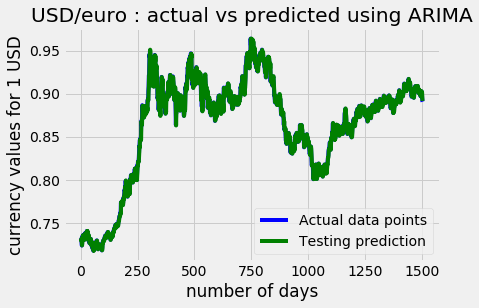

<Figure size 1296x720 with 0 Axes>

done...

Neural Network Model
loading the dataset...
splitting training and testing set...
building and training model...
Epoch 1/50
 - 1s - loss: 0.0320
Epoch 2/50
 - 1s - loss: 3.9794e-04
Epoch 3/50
 - 1s - loss: 5.5449e-05
Epoch 4/50
 - 1s - loss: 5.5148e-05
Epoch 5/50
 - 1s - loss: 6.0726e-05
Epoch 6/50
 - 1s - loss: 6.3535e-05
Epoch 7/50
 - 1s - loss: 6.5555e-05
Epoch 8/50
 - 1s - loss: 6.2996e-05
Epoch 9/50
 - 1s - loss: 6.3690e-05
Epoch 10/50
 - 1s - loss: 5.9829e-05
Epoch 11/50
 - 1s - loss: 6.1363e-05
Epoch 12/50
 - 1s - loss: 6.0854e-05
Epoch 13/50
 - 1s - loss: 5.9835e-05
Epoch 14/50
 - 1s - loss: 5.8517e-05
Epoch 15/50
 - 1s - loss: 5.9297e-05
Epoch 16/50
 - 1s - loss: 6.0723e-05
Epoch 17/50
 - 1s - loss: 5.8867e-05
Epoch 18/50
 - 1s - loss: 5.9020e-05
Epoch 19/50
 - 1s - loss: 5.9242e-05
Epoch 20/50
 - 1s - loss: 5.7588e-05
Epoch 21/50
 - 1s - loss: 5.5978e-05
Epoch 22/50
 - 1s - loss: 5.9711e-05
Epoch 23/50
 - 1s - loss: 6.1621e-05
Epoch 24/50
 - 1s - loss: 5.9770e-05
Epo

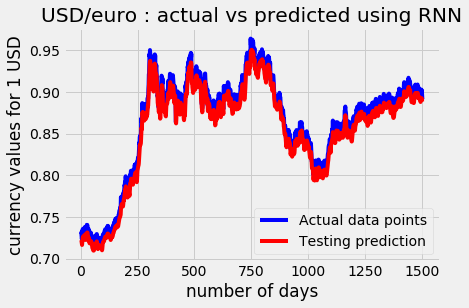

<Figure size 1296x720 with 0 Axes>

done...
Plotting combined graph of both the models...


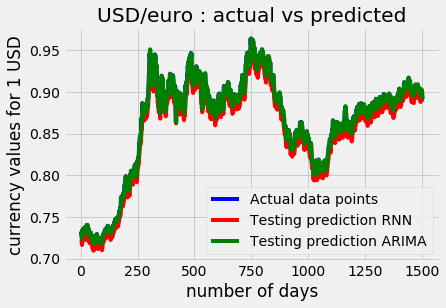

<Figure size 1296x720 with 0 Axes>

In [30]:
warnings.filterwarnings("ignore")

data_set_frame = df_euro
currency = "euro"

raw_data, testing_predict_arima, mse_arima = arima_model(currency)
training_predict, testing_predict, mse_testing = rnn_model(currency)

print('Plotting combined graph of both the models...')
plot(currency, raw_data, training_predict, testing_predict, testing_predict_arima)

It was possible to answer the Business Understanding question using both models. Both were able to predict the exchange rate of the euro currency for the next day. In the next sections, it will be evaluated which of the models performed better forecasts.

## 4.4. Assess Model
Analyzing the data and graphs resulting from our model, we can analyze how each model performed.

Both models were able to forecast the exchange rate for the next day using data from our DataSet. We can see in the graphs that the line of predicted values is very similar to the line of real values.

During the execution none of the models presented any execution error or returned any value outside the expected. This shows that the data were properly prepared and had all the necessary parameters for execution.

When we compare the result of the ARIMA model with the RNN model, we can see that ARIMA was the one that came closest to the real values. This indicates that to answer our question and with the data provided, the ARIMA model and the most indicated.

# 5. Evaluate Results
To evaluate the models, the Mean Square Error test was initially used.

The Mean Square Error tells us how far a regression line is from a set of points. It does this by taking the distances from the points to the regression line (these distances are the errors) and square them. This is necessary to remove negative signs and also gives greater weight to larger differences. It's called the Mean Square Error, because you find the mean of a set of errors. The smaller the mean square error, the closer you find the best fit line.

The results were:

In [31]:
print("ARINA - The Mean Square Error Test: ", mse_arima)
print()
print("RNN - The Mean Square Error Test: ", mse_testing)
print()

ARINA - The Mean Square Error Test:  1.962082581926245e-05

RNN - The Mean Square Error Test:  0.0001135875768683414



The Mean Square Error Test was performed for each modeling performed. We can see above that the value of Mean Square Error Test of ARIMA modeling was lower than that of RNN Modeling. This show us that the ARIMA Model predicted better results than the RNN model in this DataSet.

## 5.1. Next Steps
As it was possible to observe in the sections above it was possible to answer our question of Business Understanding using both models. We also saw that the ARIMA model performed better.

Therefore, by meeting the objectives of Business Understanding and the good performance of our model, the modeling phase can be considered finished, having performed according to expectations.

In the future, the model may be improved by implementing new features, making better use of the algorithms and answering other questions that can be asked based on the DataSet.

The modeling was limited to making an exchange rate forecast for the next day. This forecast can be increased to 3 days, 7 days or even more. It can also be implemented the option to choose which currency we want to make the prediction and not only the Euro.

As long as the formatting of the csv file is maintained. It is possible to use updated data to generate a DataSet for the model. Thus, predictions can be realized again based on these new data.

New algorithms to analyze the accuracy of the model can be implemented by improving the performance information of the modeling.

# 6. Deployment
Our project had a considerably simpler implementation than an online system that runs in real time in a commercial environment. So the implantation process is considerably simpler too.

The purpose of our implantation process is to
ensure that the entire process has been well documented ensuring that our analysis is readable, reproducible and maintained. These requirements were met using the CRISP-DM methodology together with the Jupyter Notebook program.

The use of both CRISP-DM and Jupyter Notebook allowed to detail all the stages of the analytical process, elaborate the necessary documentation and justify all the choices made in cleaning data and generating resources, selecting and evaluating models.

## 6.1. Review Project
The realization of this project was a great learning opportunity. Having the opportunity to work on a project like this from start to finish, using new methodologies, new algorithms and new techniques for manipulating DataSets was a challenge.

The CRISP-DM methodology is really essential to avoid losing the main objective when developing a Data Mining model. The focus on Business Understanding was essential to maintain the focus.

 The use of Jupyter Notebook also made the project development process much easier. The possibility of inserting our code, our outputs together with the description of the steps, makes the understanding of the whole process much better.

This was my first project carried out using prediction algorithms instead of the classification algorithms used until then. This gave me the opportunity to learn more about the Data Mining area. It became clear that this was just the tip of the iceberg, with much more to be explored.

Handling the DataSet was another challenge. Knowing the tools needed to visualize, understand, verify, clean, build and integrate the data in a DataSet and being able to apply them in a project was gratifying. However, it is clear that much more practice and knowledge is needed to be able to use these tools more effectively.

The prediction algorithms also need more studies and new projects so that they can be understood and applied more efficiently, bringing better results.